In [146]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [147]:
import os
import pandas as pd

dataFolder = r"../classificationData/"

labels = []

for folder in ["normal/", "potholes/"]:
    for filename in os.listdir(dataFolder+folder):
        if filename[-3:]=='jpg':
            labels.append([dataFolder+folder+filename, int(folder == "potholes/")])


labelDf = pd.DataFrame(labels, columns=["filename","class"])


    
    

In [148]:
labelDf


,filename,class
0,../classificationData/normal/184.jpg,0
1,../classificationData/normal/346.jpg,0
2,../classificationData/normal/262.jpg,0
3,../classificationData/normal/23.jpg,0
4,../classificationData/normal/341.jpg,0
...,...,...
641,../classificationData/potholes/81.jpg,1
642,../classificationData/potholes/52.jpg,1
643,../classificationData/potholes/199.jpg,1
644,../classificationData/potholes/187.jpg,1


In [149]:
from PIL import Image

def retrieveImage(fPath):
#     print(fPath)
    pic = np.asarray(Image.open(fPath).convert('RGB').resize((128,128))) / 255.0
    return pic

In [150]:
X = np.array(labelDf.filename.apply(retrieveImage).tolist())
Y = labelDf[['class']].to_numpy()

../classificationData/normal/184.jpg
../classificationData/normal/346.jpg
../classificationData/normal/262.jpg
../classificationData/normal/23.jpg
../classificationData/normal/341.jpg
../classificationData/normal/348.jpg
../classificationData/normal/54.jpg
../classificationData/normal/352.jpg
../classificationData/normal/219.jpg
../classificationData/normal/326.jpg
../classificationData/normal/51.jpg
../classificationData/normal/312.jpg
../classificationData/normal/159.jpg
../classificationData/normal/225.jpg
../classificationData/normal/58.jpg
../classificationData/normal/261.jpg
../classificationData/normal/171.jpg
../classificationData/normal/306.jpg
../classificationData/normal/4.jpg
../classificationData/normal/19.jpg
../classificationData/normal/218.jpg
../classificationData/normal/220.jpg
../classificationData/normal/79.jpg
../classificationData/normal/292.jpg
../classificationData/normal/258.jpg
../classificationData/normal/125.jpg
../classificationData/normal/186.jpg
../classi

In [151]:
print(X.shape)
print(Y.shape)

(646, 128, 128, 3)
(646, 1)


In [152]:
class_names = ["normal", "potholes"]

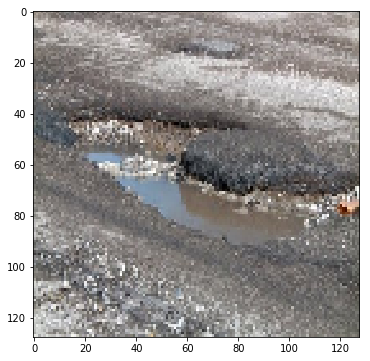

In [153]:
plt.figure()
plt.imshow(X[600])
plt.grid(False)
plt.show()

In [154]:
X = X / 255.0

/usr/local/lib/python3.5/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


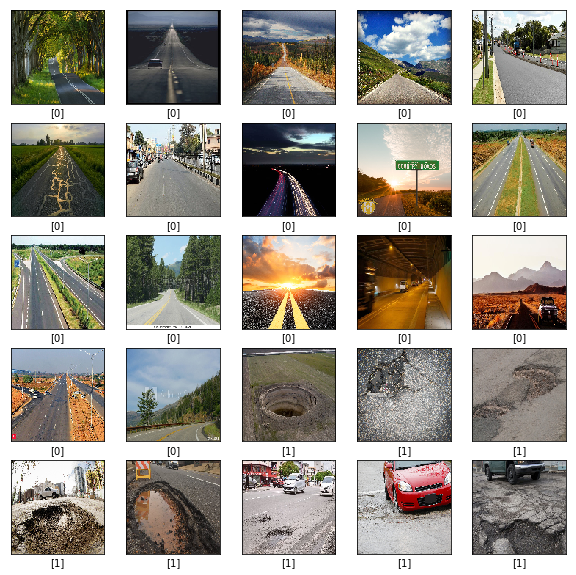

In [164]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i*20]*255.0, cmap=plt.cm.binary)
    plt.xlabel(Y[i*20])
plt.show()

In [156]:
model = keras.Sequential([
#     Conv2D(16, (2,2), input_shape=(128, 128, 3), activation='relu')
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape =(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [157]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [158]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [159]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(X,Y,test_size=0.2, shuffle = True)

In [160]:
model.fit(train_images, train_labels, validation_data=[test_images, test_labels], epochs=30)

Train on 516 samples, validate on 130 samples
Epoch 1/30
516/516 [==============================] - 6s 11ms/sample - loss: 0.6938 - accuracy: 0.4981 - val_loss: 0.6925 - val_accuracy: 0.6000
Epoch 2/30
516/516 [==============================] - 0s 781us/sample - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4000
Epoch 3/30
516/516 [==============================] - 0s 768us/sample - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6935 - val_accuracy: 0.4000
Epoch 4/30
516/516 [==============================] - 0s 776us/sample - loss: 0.6932 - accuracy: 0.4671 - val_loss: 0.6931 - val_accuracy: 0.6000
Epoch 5/30
516/516 [==============================] - 0s 767us/sample - loss: 0.6932 - accuracy: 0.4903 - val_loss: 0.6931 - val_accuracy: 0.6000
Epoch 6/30
516/516 [==============================] - 0s 767us/sample - loss: 0.6932 - accuracy: 0.4574 - val_loss: 0.6931 - val_accuracy: 0.6000
Epoch 7/30
516/516 [==============================] - 0s 801us/sample - loss: 0

In [161]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



130/130 - 0s - loss: 0.6934 - accuracy: 0.4000

Test accuracy: 0.4


### Visualize results

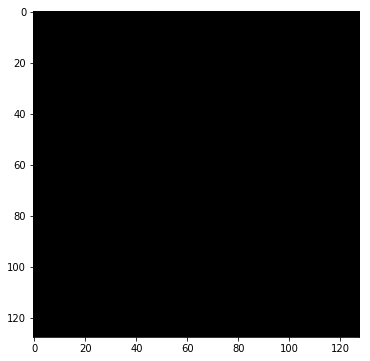

In [162]:

from matplotlib import pyplot as plt
# class_idx = 0
# indices = np.where(val_y[:, class_idx] == 1.)[0]

# pick some random input from here
idx = 20

# check picked image

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

plt.imshow(test_images[idx][...])

In [163]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# utility ot search for layer index by name
# or we could specify -1 for last layer. 
layer_idx = -1

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices = class_idx, seed_input=test_images[idx])
# plot with jet colormap to visualize  as heatmap
plt.imshow(grads, cmap='jet')

ImportError: No module named 'vis'

In [ ]:
from datetime import datetime
timeStamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
model_file_path = os.path.join("model_classification" + timeStamp +""+ ".h5")
model.save(model_file_path)
print("Model saved to {}".format(model_file_path))